In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
from PIL import Image
import torchvision
from torchvision import transforms
import seaborn as sns
import scipy.stats as stats

In [15]:
import os
print(os.getcwd())

/home/filiptimov/hautkrebs/HAM10000_7_classes


In [16]:

# Load the metadata CSV
metadata = pd.read_csv('../dataset/HAM10000_metadata.csv')


# Counts the number of samples per class in the 'dx' column
class_counts = metadata['dx'].value_counts()

# Prints the result
print("Number of images per class:")
print(class_counts)

Number of images per class:
dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


In [17]:

train_dir = '../dataset/organized'

train_data_torch = torchvision.datasets.ImageFolder(root=train_dir)

# Print number of images and class names
print("Number of train samples:", len(train_data_torch))
print("Detected classes:", train_data_torch.class_to_idx)

# Count how many images per class
class_to_idx = train_data_torch.class_to_idx
idx_to_class = {v: k for k, v in class_to_idx.items()}

labels = np.array(train_data_torch.targets)
(unique, counts) = np.unique(labels, return_counts=True)

for idx, count in zip(unique, counts):
    print(f"{idx_to_class[idx]}: {count}")

Number of train samples: 10015
Detected classes: {'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}
akiec: 327
bcc: 514
bkl: 1099
df: 115
mel: 1113
nv: 6705
vasc: 142


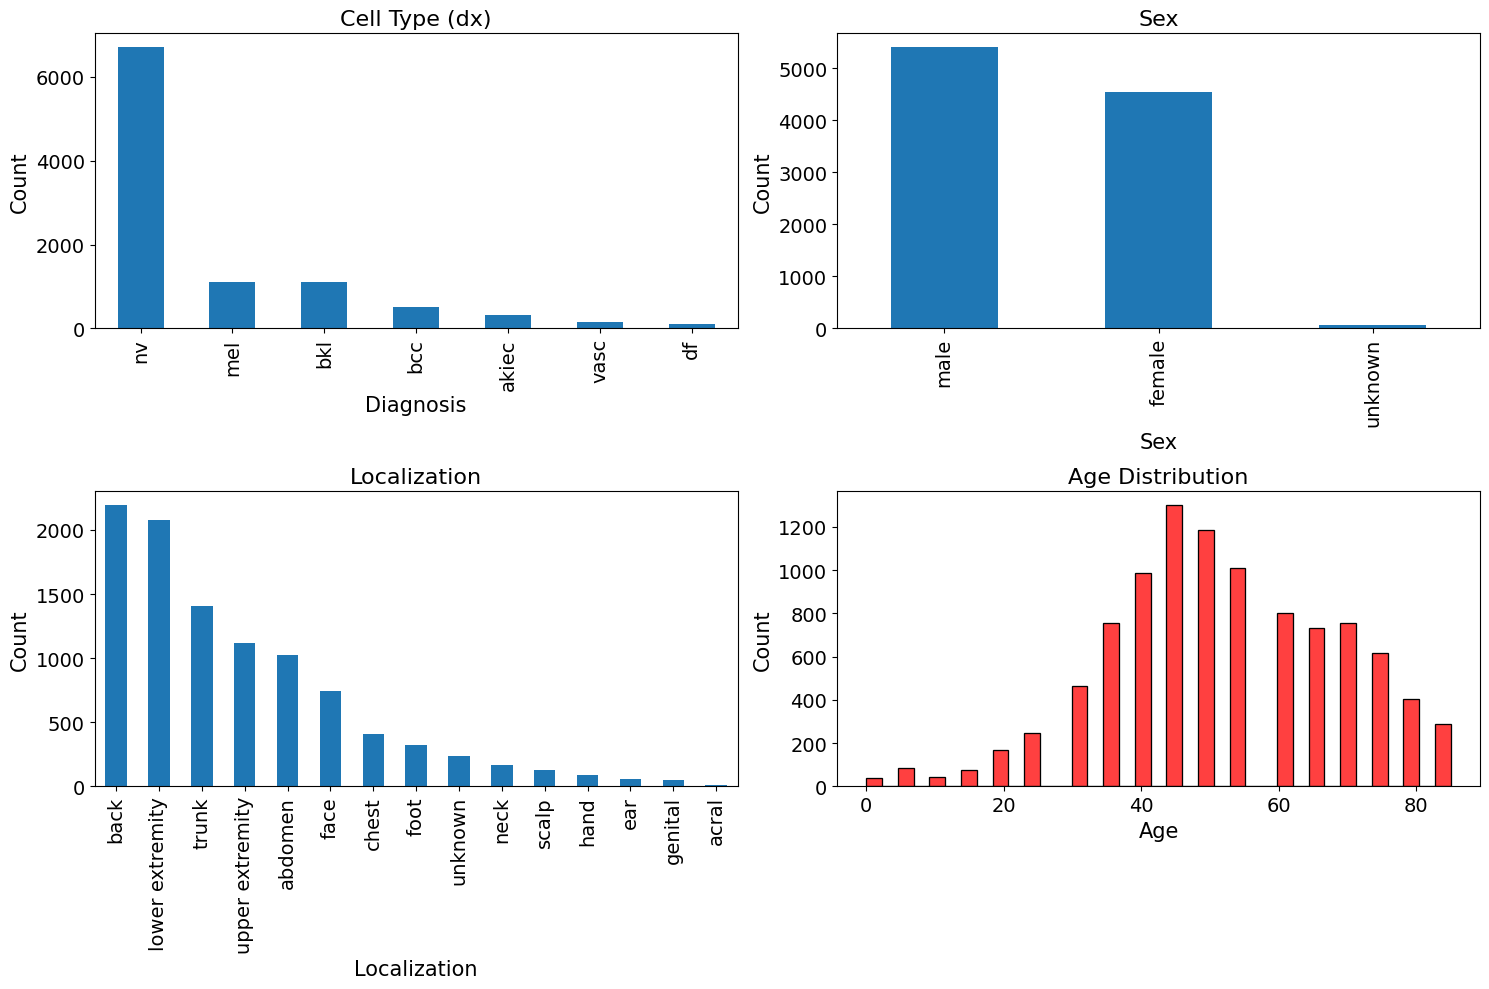

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load the metadata
skin_df = pd.read_csv('../dataset/HAM10000_metadata.csv')

# Plot setup
fig = plt.figure(figsize=(15, 10))

# Set global font size
title_fontsize = 16
label_fontsize = 15
tick_fontsize = 14

# Cell Type / Diagnosis (dx)
ax1 = fig.add_subplot(221)
skin_df['dx'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count', fontsize=label_fontsize)
ax1.set_xlabel('Cell Type', fontsize=label_fontsize)
ax1.set_title('Cell Type', fontsize=title_fontsize)
ax1.tick_params(axis='x', labelsize=tick_fontsize)
ax1.tick_params(axis='y', labelsize=tick_fontsize)

# Sex
ax2 = fig.add_subplot(222)
skin_df['sex'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_ylabel('Count', fontsize=label_fontsize)
ax2.set_xlabel('Sex', fontsize=label_fontsize)
ax2.tick_params(axis='x', labelsize=tick_fontsize)
ax2.tick_params(axis='y', labelsize=tick_fontsize)

# Localization
ax3 = fig.add_subplot(223)
skin_df['localization'].value_counts().plot(kind='bar', ax=ax3)
ax3.set_ylabel('Count', fontsize=label_fontsize)
ax3.set_xlabel('Localization', fontsize=label_fontsize)
ax3.tick_params(axis='x', labelsize=tick_fontsize, rotation=90)
ax3.tick_params(axis='y', labelsize=tick_fontsize)

# Age distribution
ax4 = fig.add_subplot(224)
sample_age = skin_df[pd.notnull(skin_df['age'])]
sns.histplot(sample_age['age'], ax=ax4, color='red')
ax4.set_title('Age Distribution', fontsize=title_fontsize)
ax4.set_xlabel('Age', fontsize=label_fontsize)
ax4.set_ylabel('Count', fontsize=label_fontsize)
ax4.tick_params(axis='x', labelsize=tick_fontsize)
ax4.tick_params(axis='y', labelsize=tick_fontsize)

# Layout
plt.tight_layout()
plt.show()